In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from pylab import mpl

# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

In [2]:
# header = ['longitude', 'latitude', 'housingMedianAge',
#           'totalRooms', 'totalBedrooms', 'population',
#           'households', 'medianIncome', 'medianHouseValue']
header = ['经度', '纬度', '住房年龄中位数', '总房间数', '卧室总数', '人口', '家庭', '中位数收入', '中位数房屋价值']
df = pd.read_csv('cal_housing.data', names=header)
df.head()

,经度,纬度,住房年龄中位数,总房间数,卧室总数,人口,家庭,中位数收入,中位数房屋价值
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   经度       20640 non-null  float64
 1   纬度       20640 non-null  float64
 2   住房年龄中位数  20640 non-null  float64
 3   总房间数     20640 non-null  float64
 4   卧室总数     20640 non-null  float64
 5   人口       20640 non-null  float64
 6   家庭       20640 non-null  float64
 7   中位数收入    20640 non-null  float64
 8   中位数房屋价值  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
#查看重复值
df.duplicated().sum()

0

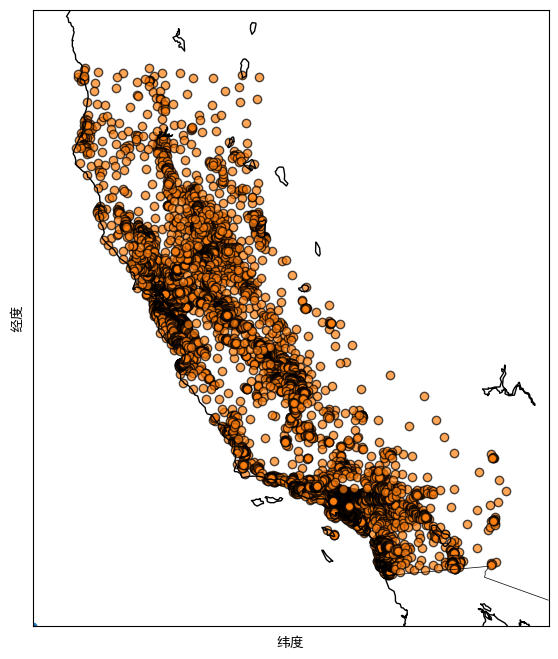

In [5]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='纬度', y='经度', data=df)
# 创建地图
m = Basemap(
    projection='merc',
    llcrnrlat=df['纬度'].min() - 1,
    urcrnrlat=df['纬度'].max() + 1,
    llcrnrlon=df['经度'].min() - 1,
    urcrnrlon=df['经度'].max() + 1,
    resolution='i'
)
# 画出海岸线和国家边界
m.drawcoastlines()
m.drawcountries()
# 将经纬度转换为地图坐标
x, y = m(df['经度'].values, df['纬度'].values)
# 在地图上添加散点
scatter = m.scatter(x, y, alpha=0.7, edgecolor='k', linewidth=1)
plt.show()

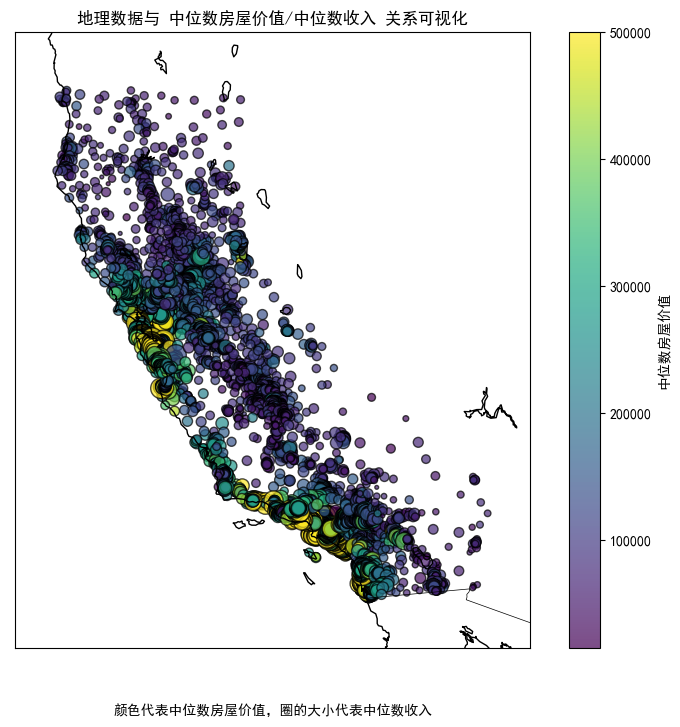

In [6]:
plt.figure(figsize=(10, 8))
m.drawcoastlines()
m.drawcountries()
scatter = m.scatter(x, y, c=df['中位数房屋价值'], cmap='viridis', s=df['中位数收入'] * 15,
                    alpha=0.7, edgecolor='k', linewidth=1)
# 添加颜色条
plt.colorbar(scatter, label='中位数房屋价值')
plt.title('地理数据与 中位数房屋价值/中位数收入 关系可视化')
plt.text(0.5, -0.1, '颜色代表中位数房屋价值，圈的大小代表中位数收入', ha='center', va='center',
         transform=plt.gca().transAxes)
plt.show()

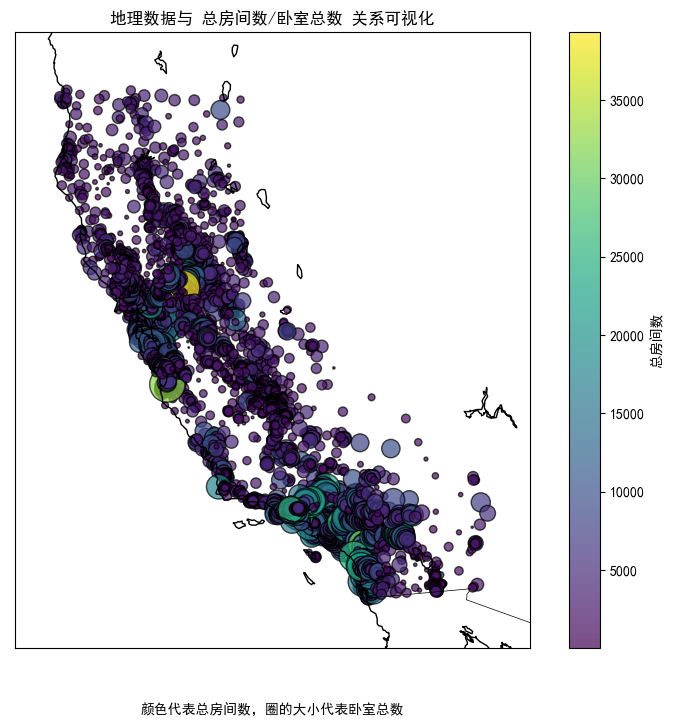

In [7]:
plt.figure(figsize=(10, 8))
m.drawcoastlines()
m.drawcountries()
scatter = m.scatter(x, y, c=df['总房间数'], cmap='viridis', s=df['卧室总数'] * 0.1,
                    alpha=0.7, edgecolor='k', linewidth=1)
# 添加颜色条
plt.colorbar(scatter, label='总房间数')
plt.title('地理数据与 总房间数/卧室总数 关系可视化')
plt.text(0.5, -0.1, '颜色代表总房间数，圈的大小代表卧室总数', ha='center', va='center',
         transform=plt.gca().transAxes)
plt.show()

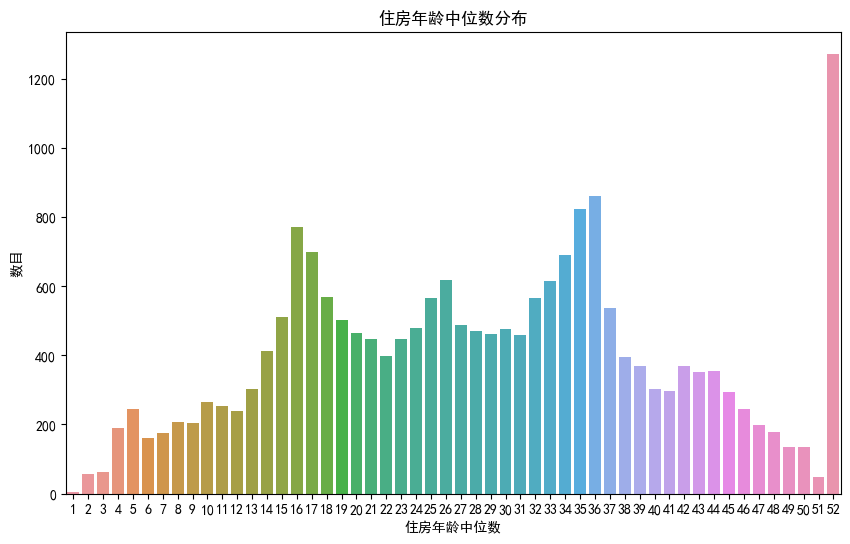

In [8]:
plt.figure(figsize=(10, 6))
# 使用 Seaborn 的 countplot 函数绘制 'housingMedianAge' 的柱状图
df['住房年龄中位数'] = df['住房年龄中位数'].astype(int)
sns.countplot(x='住房年龄中位数', data=df)
# 添加标题和轴标签
plt.title('住房年龄中位数分布')
plt.xlabel('住房年龄中位数')
plt.ylabel('数目')
# 显示图形
plt.show()

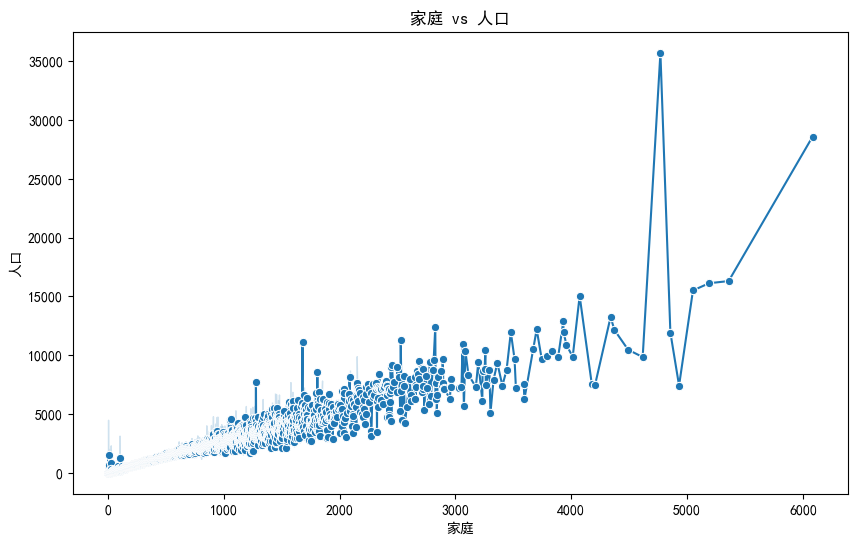

In [9]:
plt.figure(figsize=(10, 6))
# 使用Seaborn的lineplot函数绘制折线图
sns.lineplot(x='家庭', y='人口', data=df, marker='o')
# 添加标题和轴标签
plt.title('家庭 vs 人口')
plt.xlabel('家庭')
plt.ylabel('人口')
# 显示图形
plt.show()

In [10]:
# 对DataFrame中的各个列进行归一化
df = (df - df.min()) / (df.max() - df.min())
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

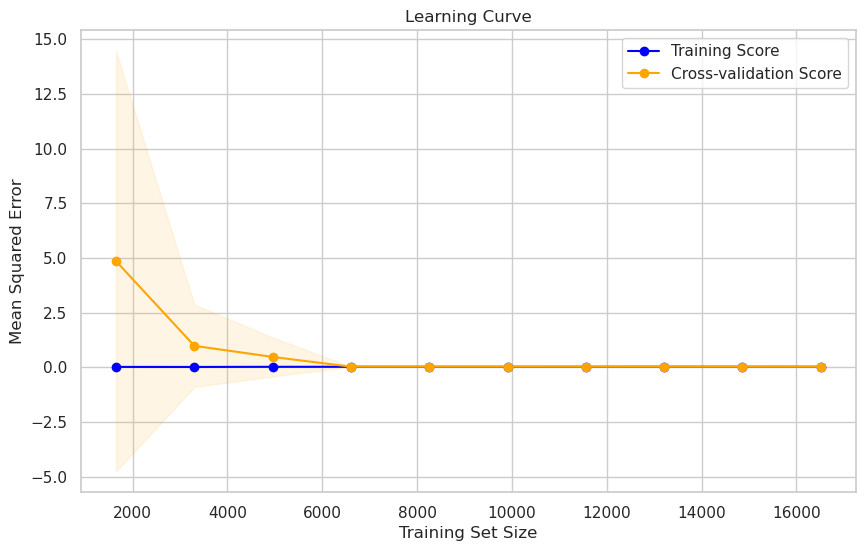

In [11]:
# 设置Seaborn风格
sns.set(style="whitegrid")
# 初始化模型
model = LinearRegression()
# 计算训练曲线
train_sizes, train_scores, test_scores = learning_curve(
    model, x, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)
# 计算均值和标准差
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# 绘制训练曲线
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                 color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation Score")
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

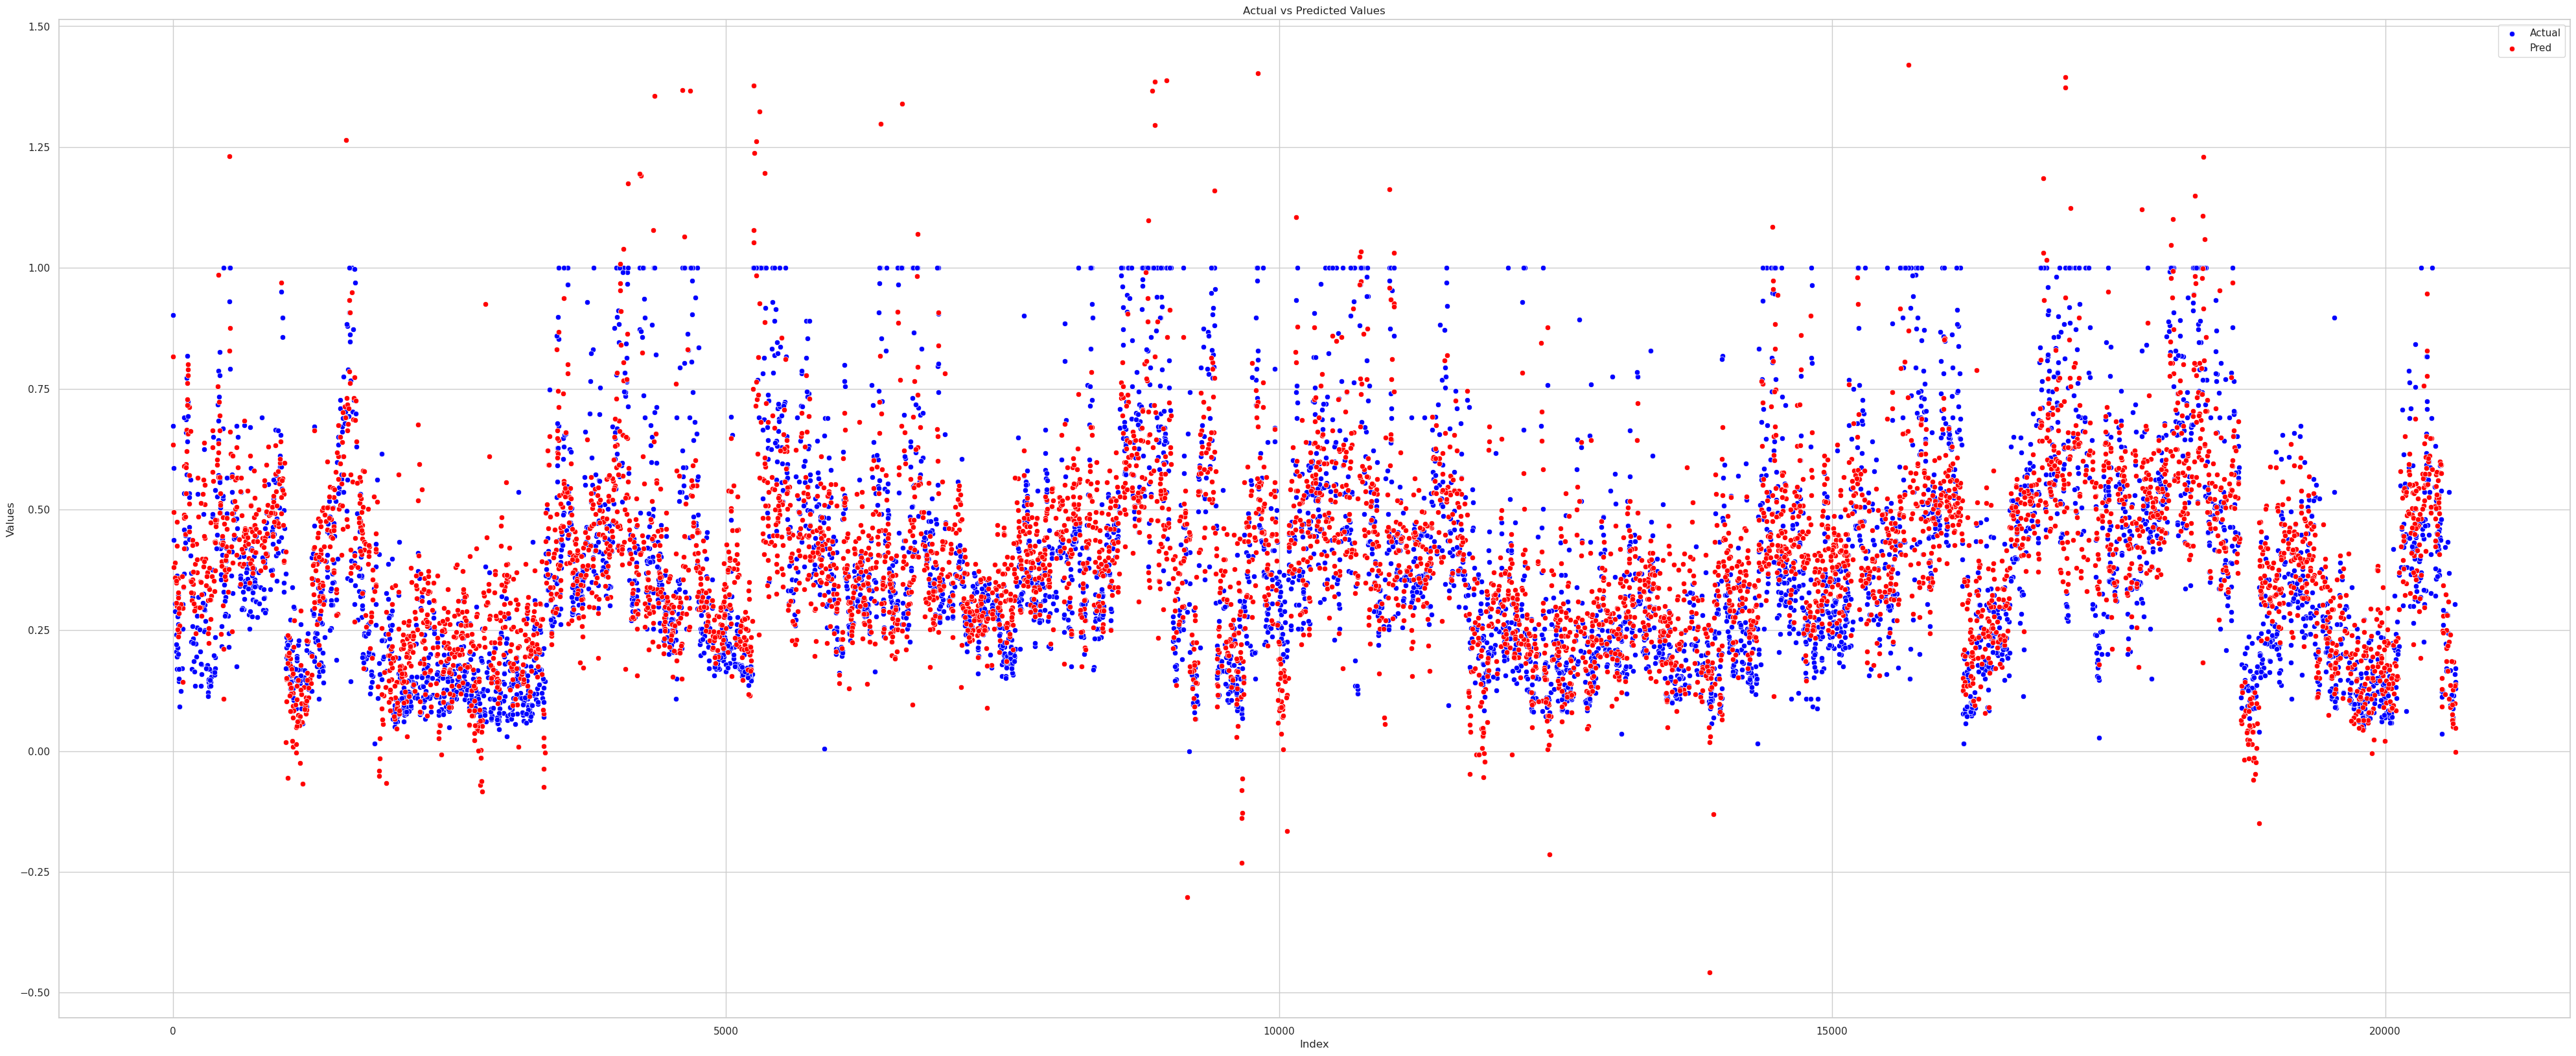

In [12]:
# 训练最终模型
final_model = LinearRegression()
final_model.fit(x, y)
# 绘制预测结果和真实值的散点图
plt.figure(figsize=(50, 20))
sns.scatterplot(x=ytest.index, y=ytest,color='blue',label='Actual')
sns.scatterplot(x=ytest.index, y=final_model.predict(xtest),color='red',label='Pred')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

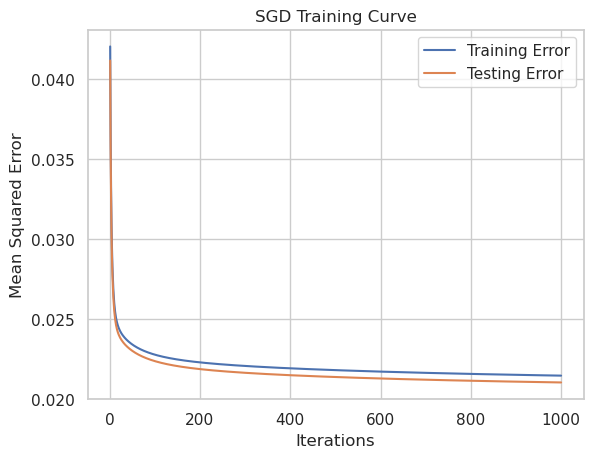

In [13]:
# 初始化梯度下降线性回归模型
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
# 拟合模型
# 存储训练集和测试集上的均方误差
train_errors, test_errors = [], []
# 迭代训练
n_iterations = 1000
for iteration in range(n_iterations):
    sgd_reg.partial_fit(xtrain, ytrain.ravel())
    # 在训练集上计算均方误差
    train_pred = sgd_reg.predict(xtrain)
    train_errors.append(mean_squared_error(ytrain, train_pred))

    # 在测试集上计算均方误差
    test_pred = sgd_reg.predict(xtest)
    test_errors.append(mean_squared_error(ytest, test_pred))
# 绘制训练曲线
plt.plot(range(1, n_iterations + 1), train_errors, label='Training Error')
plt.plot(range(1, n_iterations + 1), test_errors, label='Testing Error')
plt.title('SGD Training Curve')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

截距(intercept): [0.70848124]
斜率(coef): [-0.86694733 -0.8004608   0.12873426 -0.233812    0.69265404 -1.06655061
  0.28432669  1.16387675]
均方误差（MSE）: 0.021030980804389667


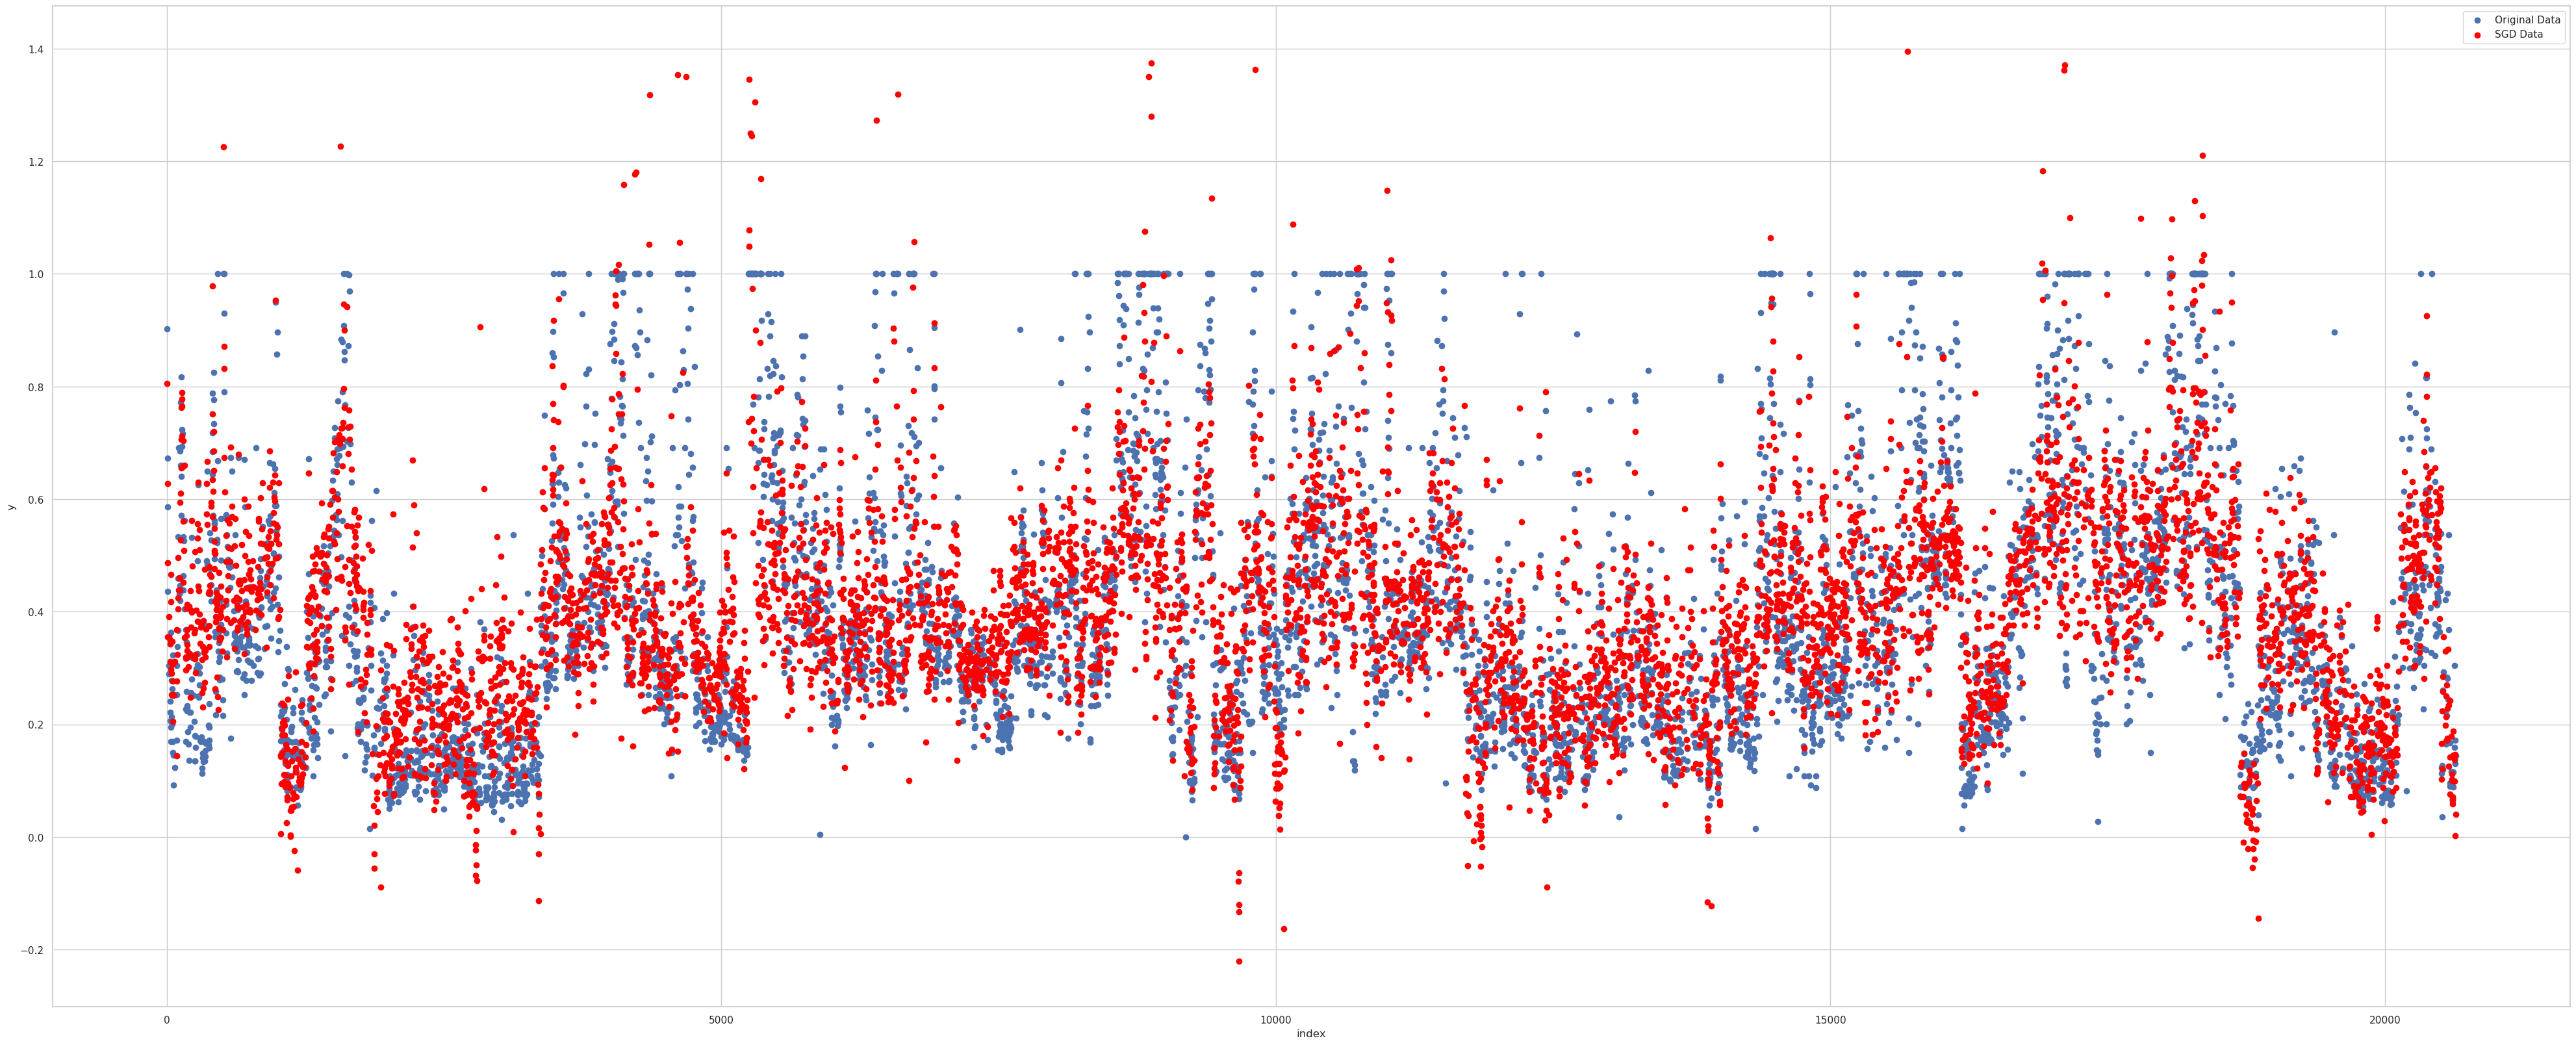

In [14]:
# 打印模型参数
print("截距(intercept):", sgd_reg.intercept_)
print("斜率(coef):", sgd_reg.coef_)
# 在测试集上进行预测
y_pred = sgd_reg.predict(xtest)
# 计算均方误差（Mean Squared Error）
mse = mean_squared_error(ytest, y_pred)
print("均方误差（MSE）:", mse)
# 绘制原始数据和拟合直线
plt.figure(figsize=(50, 20))
plt.scatter(ytest.index, ytest, label='Original Data')
plt.scatter(ytest.index, y_pred, label='SGD Data', color='red')
plt.xlabel('index')
plt.ylabel('y')
plt.legend()
plt.show()